<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_9_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 500
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=num_words)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state = 42)

maxlen = 100
train_seq = pad_sequences(train_input, maxlen=maxlen)
val_seq = pad_sequences(val_input, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1. LSTM 사용해보기

In [2]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(num_words, 16, input_length = maxlen))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
          validation_data=(val_seq, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5206 - loss: 0.6928

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5208 - loss: 0.6928 - val_accuracy: 0.5716 - val_loss: 0.6920
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5817 - loss: 0.6916

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5817 - loss: 0.6916 - val_accuracy: 0.6028 - val_loss: 0.6901
Epoch 3/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6113 - loss: 0.6893

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6114 - loss: 0.6892 - val_accuracy: 0.6222 - val_loss: 0.6863
Epoch 4/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6270 - loss: 0.6843

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6271 - loss: 0.6843 - val_accuracy: 0.6466 - val_loss: 0.6777
Epoch 5/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6530 - loss: 0.6730

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6532 - loss: 0.6729 - val_accuracy: 0.6808 - val_loss: 0.6555
Epoch 6/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6892 - loss: 0.6384

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6893 - loss: 0.6382 - val_accuracy: 0.7202 - val_loss: 0.5856
Epoch 7/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7347 - loss: 0.5688

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7346 - loss: 0.5687 - val_accuracy: 0.7388 - val_loss: 0.5544
Epoch 8/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7476 - loss: 0.5457

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7477 - loss: 0.5457 - val_accuracy: 0.7520 - val_loss: 0.5361
Epoch 9/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7631 - loss: 0.5217

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7631 - loss: 0.5217 - val_accuracy: 0.7642 - val_loss: 0.5182
Epoch 10/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7708 - loss: 0.5113

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7709 - loss: 0.5113 - val_accuracy: 0.7726 - val_loss: 0.5042
Epoch 11/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7796 - loss: 0.4966

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7796 - loss: 0.4965 - val_accuracy: 0.7814 - val_loss: 0.4918
Epoch 12/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7860 - loss: 0.4827

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7860 - loss: 0.4827 - val_accuracy: 0.7752 - val_loss: 0.4892
Epoch 13/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7970 - loss: 0.4673

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7969 - loss: 0.4673 - val_accuracy: 0.7778 - val_loss: 0.4823
Epoch 14/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7972 - loss: 0.4624

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7972 - loss: 0.4624 - val_accuracy: 0.7884 - val_loss: 0.4688
Epoch 15/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8020 - loss: 0.4536

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8020 - loss: 0.4536 - val_accuracy: 0.7902 - val_loss: 0.4626
Epoch 16/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8033 - loss: 0.4441

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8033 - loss: 0.4442 - val_accuracy: 0.7914 - val_loss: 0.4587
Epoch 17/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8027 - loss: 0.4460

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8027 - loss: 0.4459 - val_accuracy: 0.7916 - val_loss: 0.4576
Epoch 18/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8064 - loss: 0.4397

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8064 - loss: 0.4397 - val_accuracy: 0.7906 - val_loss: 0.4554
Epoch 19/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8095 - loss: 0.4333 - val_accuracy: 0.7892 - val_loss: 0.4585
Epoch 20/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8104 - loss: 0.4350

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8104 - loss: 0.4350 - val_accuracy: 0.7940 - val_loss: 0.4461
Epoch 21/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8108 - loss: 0.4286

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8108 - loss: 0.4286 - val_accuracy: 0.7962 - val_loss: 0.4459
Epoch 22/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8164 - loss: 0.4205

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8164 - loss: 0.4206 - val_accuracy: 0.7956 - val_loss: 0.4443
Epoch 23/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8140 - loss: 0.4213

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8140 - loss: 0.4214 - val_accuracy: 0.7972 - val_loss: 0.4416
Epoch 24/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8166 - loss: 0.4163

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8166 - loss: 0.4164 - val_accuracy: 0.7986 - val_loss: 0.4394
Epoch 25/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8186 - loss: 0.4148

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8185 - loss: 0.4150 - val_accuracy: 0.7996 - val_loss: 0.4379
Epoch 26/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8156 - loss: 0.4163 - val_accuracy: 0.7958 - val_loss: 0.4442
Epoch 27/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8153 - loss: 0.4180

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8153 - loss: 0.4180 - val_accuracy: 0.8004 - val_loss: 0.4357
Epoch 28/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8166 - loss: 0.4139 - val_accuracy: 0.7978 - val_loss: 0.4385
Epoch 29/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8156 - loss: 0.4133

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8156 - loss: 0.4134 - val_accuracy: 0.8028 - val_loss: 0.4351
Epoch 30/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8158 - loss: 0.4141

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8158 - loss: 0.4141 - val_accuracy: 0.7990 - val_loss: 0.4342
Epoch 31/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8185 - loss: 0.4124

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8185 - loss: 0.4124 - val_accuracy: 0.8002 - val_loss: 0.4327
Epoch 32/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8164 - loss: 0.4098 - val_accuracy: 0.7990 - val_loss: 0.4387
Epoch 33/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8235 - loss: 0.4023

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8234 - loss: 0.4024 - val_accuracy: 0.8024 - val_loss: 0.4302
Epoch 34/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8143 - loss: 0.4115 - val_accuracy: 0.7960 - val_loss: 0.4384
Epoch 35/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8171 - loss: 0.4070 - val_accuracy: 0.8038 - val_loss: 0.4302
Epoch 36/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8191 - loss: 0.4048

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8191 - loss: 0.4048 - val_accuracy: 0.8040 - val_loss: 0.4288
Epoch 37/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8189 - loss: 0.4040 - val_accuracy: 0.8006 - val_loss: 0.4316
Epoch 38/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8200 - loss: 0.3951 - val_accuracy: 0.8018 - val_loss: 0.4316
Epoch 39/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8183 - loss: 0.4038

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8183 - loss: 0.4038 - val_accuracy: 0.8030 - val_loss: 0.4277
Epoch 40/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8197 - loss: 0.4063 - val_accuracy: 0.8000 - val_loss: 0.4318
Epoch 41/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8209 - loss: 0.3984 - val_accuracy: 0.8016 - val_loss: 0.4309
Epoch 42/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8192 - loss: 0.4013 - val_accuracy: 0.7982 - val_loss: 0.4347


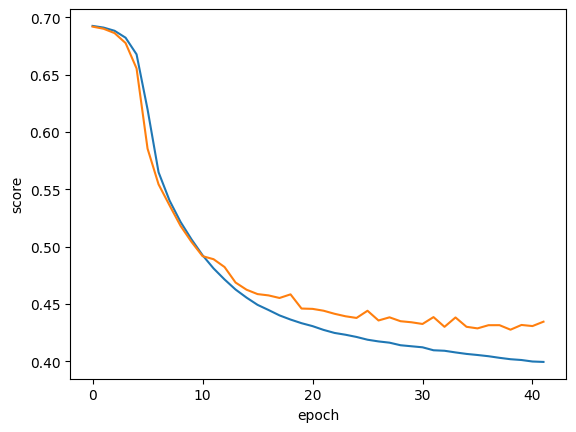

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('score')
plt.show()

2. LSTM에 dropout 적용하기

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(num_words, 16, input_length = maxlen))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_dropout_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history2 = model2.fit(train_seq, train_target, epochs=5, verbose=0,
           validation_data = (val_seq, val_target),
           callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


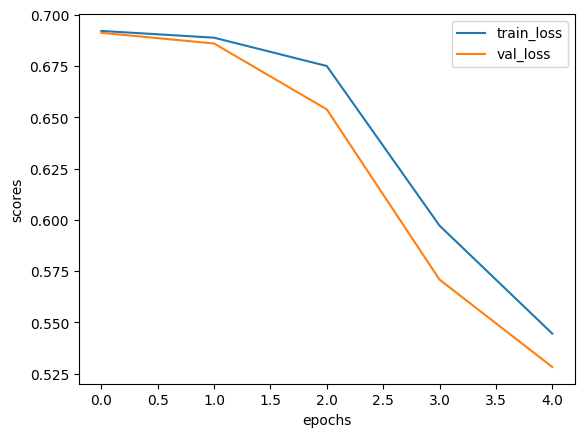

In [9]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('scores')
plt.legend(['train_loss','val_loss'])
plt.show()

3. LSTM 2개 연결하기

In [23]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(num_words, 16, input_length = maxlen))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_2lstm_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history3 = model3.fit(train_seq, train_target, epochs=100, verbose=0,
           validation_data=(val_seq, val_target),
           callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

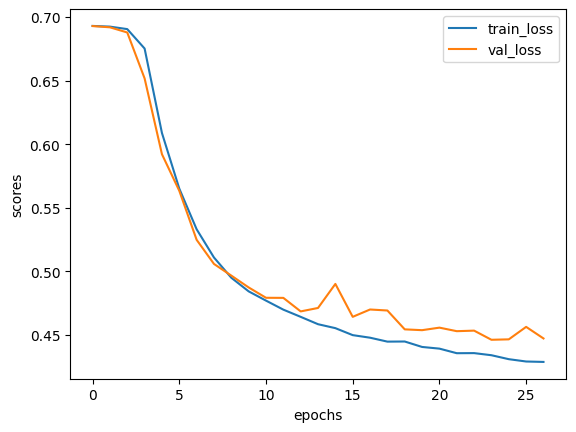

In [24]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('scores')
plt.legend(['train_loss','val_loss'])
plt.show()

4. GRU 사용하기

In [18]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(num_words, 16, input_length = maxlen))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_gru_model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history4 = model4.fit(train_seq, train_target, epochs=100, verbose=0,
           validation_data=(val_seq, val_target),
           callbacks=[checkpoint_cb, early_stopping_cb])

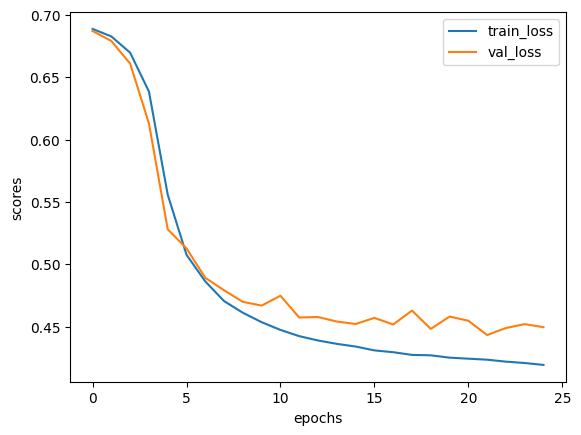

In [21]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('scores')
plt.legend(['train_loss','val_loss'])
plt.show()

#테스트

In [25]:
test_seq = pad_sequences(test_input, maxlen=maxlen)
best_model = keras.models.load_model('best_2lstm_model.h5')
best_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7969 - loss: 0.4466


[0.44700366258621216, 0.7955999970436096]